In [1]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data 

dataset = pd.read_csv("/home/dabas.a/project/train.csv")
dataset

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [3]:
dataset[dataset["target"]==1]

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1
...,...,...,...,...,...,...,...,...
32969,ISIC_9955163,IP_7507212,male,55.0,upper extremity,melanoma,malignant,1
33000,ISIC_9963177,IP_1165806,male,70.0,torso,melanoma,malignant,1
33014,ISIC_9967383,IP_7887363,male,60.0,upper extremity,melanoma,malignant,1
33050,ISIC_9978107,IP_2860540,male,65.0,lower extremity,melanoma,malignant,1


In [3]:
# null values in the dataset

dataset.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [4]:
# unique values in the dataset

dataset.nunique()

image_name                       33126
patient_id                        2056
sex                                  2
age_approx                          18
anatom_site_general_challenge        6
diagnosis                            9
benign_malignant                     2
target                               2
dtype: int64

# Visualizations

/home/dabas.a/miniconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='benign_malignant', ylabel='count'>

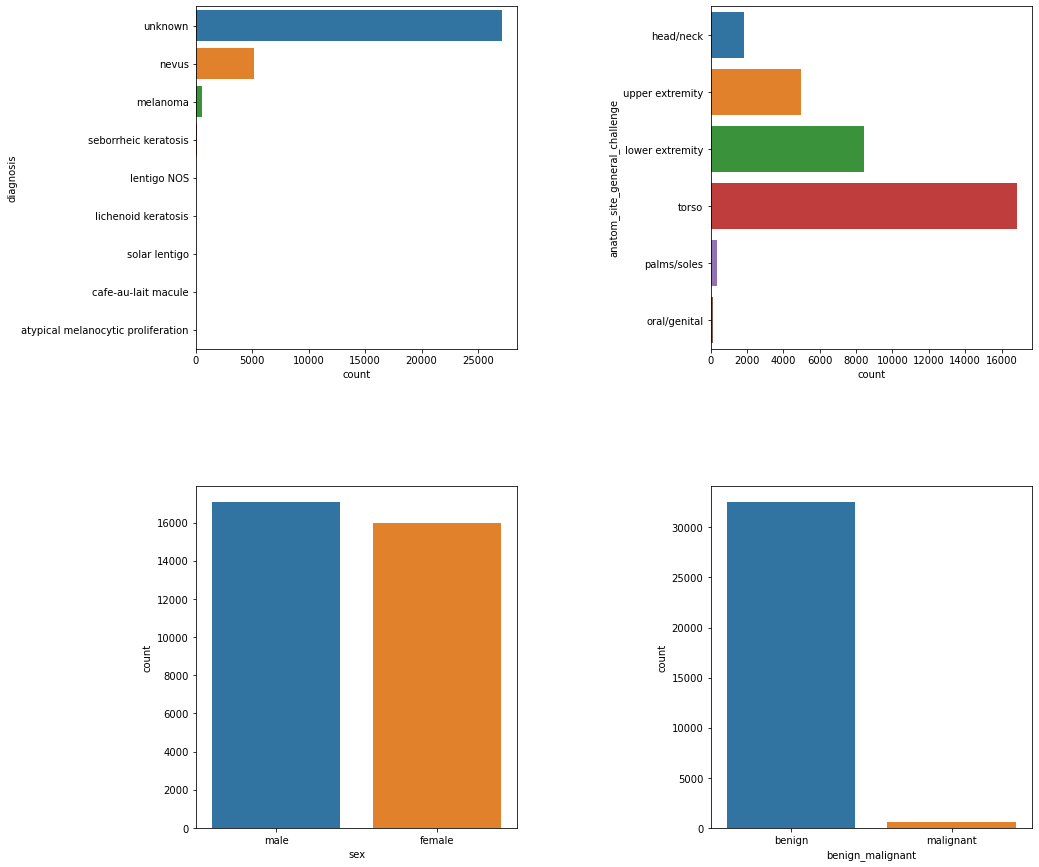

In [5]:
# multiple plots for different features

f, axes = plt.subplots(2, 2, figsize=(12,12))
f.tight_layout() 
plt.subplots_adjust(left=0.01, wspace=0.6, hspace=0.4)
sns.countplot(y="anatom_site_general_challenge", data=dataset,  ax=axes[0][1])
sns.countplot(y="diagnosis", data=dataset,  ax=axes[0][0])
sns.countplot(x='sex', data=dataset, ax=axes[1][0])
sns.countplot("benign_malignant", data=dataset,  ax=axes[1][1]) 

(512, 512, 3)

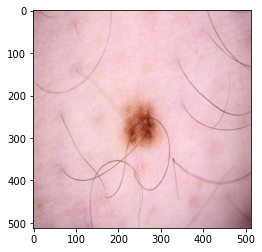

In [3]:
image = plt.imread("/scratch/dabas.a/data/jpeg/train_resize/ISIC_5766923.jpg")
plt.imshow(image)
image.shape

(512, 512, 3)

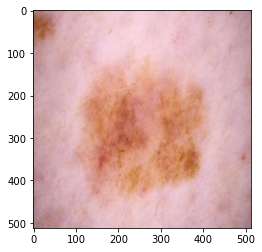

In [9]:
image = plt.imread("/scratch/dabas.a/data/jpeg/train_resize/ISIC_0247330.jpg")
plt.imshow(image)
image.shape

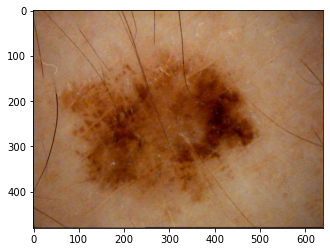

In [6]:
# Image visualizations with matplot lib 
image = plt.imread("/scratch/dabas.a/data/jpeg/train/ISIC_9955163.jpg")
plt.imshow(image)

In [22]:
# shape of the image 

image.shape

(4000, 6000, 3)

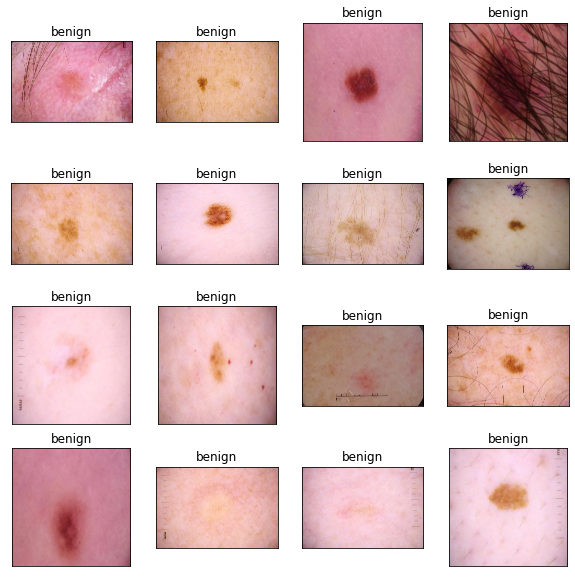

In [24]:
# display the benign images


w = 10
h = 10
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 4

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = plt.imread('/scratch/dabas.a/data/jpeg/train/'+dataset['image_name'][i]+'.jpg')
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    # Hide grid lines
    ax[-1].grid(False)

    # Hide axes ticks
    ax[-1].set_xticks([])
    ax[-1].set_yticks([])
    ax[-1].set_title(dataset['benign_malignant'][i])  # set title
    plt.imshow(img)



plt.show()